# Strategy

- Preprocessing
    - Remove ctrl_vehicle
    - RankGauss
    - PCA + Existing Features
    - KMeans
    - Basic stats
- Model
    - Multi head ResNet (tensorflow)
    - TabNet (pytorch)
- Training
    - Pre-train with non-scored target
    - Train with public test pseudo label
    - Add swap noise
    - Optimizer: Adam/AdamW with weight_decay
    - Loss: BCE with Label smoothing + Logits
- Prediction
    - Ensemble above.

# Score

| Version | LB         | CV                      | AUC                   | CV Strategy | Fold | Seed | Execution Time | Blend Weight            |
| ---     | ---        | ---                     | ---                   | ---         | ---  | ---  | ---            | ---                     |
| v65     | 0.01823    | 0.01617542475216824     | -                     | old         | 5    | 3    | 4697s          | -                       |
| v80     | 0.01837    | 0.01667020593849        | 0.6648896787429924    | new         | 5    | 3    | 4421s          | -                       |
| v82     | 0.01831    | 0.015602756672807215    | 0.8186556909524331    | old         | 5    | 3    | 4997s          | -                       |
| v84     | 0.01835    | 0.016074252564811344    | 0.7612621209944287    | ensemble    | 5    | 2    | 6314s          | -                       |
| v85     | 0.01828    | 0.015434994072972176    | 0.8286985624571163    | old         | 5    | 3    | 5117s          | -                       |
| v86     | 0.01830    | 0.015259595245052899    | 0.8452802832071501    | old         | 5    | 3    | 5009s          | -                       |
| v87     | 0.01828    | 0.015175610900380308    | 0.8423746866733632    | old         | 5    | 3    | 5431s          | -                       |
| v88     | 0.01833    | 0.016577553117110334    | 0.6818396112329141    | new         | 5    | 3    | 4514s          | -                       |
| v89     | 0.01829    | 0.015641367689461786    | 0.8047873468589011    | ensemble    | 5    | 2    | 6780s          | -                       |
| v95     | 0.01839    | 0.01663198621996857     | 0.672225012937386     | new         | 5    | 3    | 4252s          | -                       |
| v99     | 0.01830    | 0.015189184341729493    | 0.8420906362134304    | old         | 5    | 3    | 5773s          | -                       |
| v100    | 0.01833    | 0.01656720665455032     | 0.6840103620313757    | new         | 5    | 3    | 4680s          | [0.51164704 0.48835296] |
| v101    | 0.01830    | 0.015183626489439578    | 0.843703992539187     | old         | 5    | 3    | 5878s          | [0.52 0.48]             |
| v102    | -          | 0.015135838689740356    | 0.8451226146134456    | old         | 5    | 3    | 3734s          | [0.52 0.48]             |
| v103    |            | 0.016536242921597825    | 0.6838286812341022    | new         | 7    | 3    | 5144s          | [0.54292787 0.45707213] |
| v104    | 0.01828    | 0.015071106262833596    | 0.8482520004180092    | old         | 7    | 3    | 5960s          | [0.54 0.46]             |
| v105    | 0.01836    | 0.01677800119352758     | 0.662181721922453     | new         | 7    | 3    | 4310s          | [0.46308043 0.53691957] |




# Change Log

- v65
    - Remove clipping.
    - Disable Variance Encoding.
- v66
    - Add AUC.
    - CV only with original training data.
- v67
    - Add `train_drug.csv` .
    - Add Drug and MultiLabel Stratification.
- v68
    - Remove public test pseudo label.
    - Enable pseudo labeling.
    - Disable pre-training with non-scored target.
- V69
    - Disable pseudo labeling.
    - Re-enable pre-training with non-scored target.
    - Re-add public test pseudo label.
    - Add correlation.
    - Update label smoothing parameter.
- v70
    - Amend num of seed.
- v71
    - Update model parameters.
        - ResNet network
        - TabNet dimension
- v72
    - Add KMeans and basic stats.
    - Add NODE model.
- v73
    - Update split condition of group multilabel stratified kfold.
    - Update NODE parameters.
- v74
    - Disable pre-train with non-scored target due to execution time reduction.
- v75
    - Fold 5 to 7.
- v76
    - Remove ResNet for execution time reduction.
- v77
    - Use 3 models. ["ResNet", "TabNet", "NODE"]
    - Enable pre-train for ResNet.
- v78
    - Reset fold eash seeds.
- v79
    - Add simple NN model again.
    - Fold 7 to 5.
- v80
    - Remove simple NN and NODE model.
    - Increase num of seed x2 to x3.
- v81
    - Use ctrl_vehicle.
- v82
    - Remove ctrl_vehicle.
    - Add flag to disable cv_with_drug_id. Disable for now.
        - It may be good options that
            - is enabled for parameter tuning.
            - is disabled for training.
- v83
    - Change input of ResNet network.
- v84
    - Revert v83.
    - Ensemble old and new cv predictions.
- v85
    - Separate model by CV.
    - Use old cv oriented model.
- v86
    - Update public test label to v65.
- v87
    - Remove unused code.
        - Model(SimpleNN, NODE)
        - Pseudo labeling
        - Variable(CV_WITH_DRUG_ID)
        - AdaBelief
        - Weighted ensemble
        - Clipping
    - Hyper parameter tuning for ResNet to use 5 layers.
- v90
    - Hyper parameter tuning for New CV on ResNet.
    - Blend weight optimization.
- v95
    - Fix final weights.
- v96
    - Restore v87 model.
    - 7 kfold.
- v97
    - Add swap noise.
- v100
    - Enable blend optimization.
- v101
    - Fixed blend weights.
- v102
    - Load pre-train model with non-scored target.
- v105
    - Add TabNet pre-train code. (WIP)
    - Use more strict drug group kfold.
- v106
    - Disable public test pseudo labeling.

# Setup

## Variables

In [22]:
import sys

IN_COLAB = "google.colab" in sys.modules

In [23]:
USE_PUBLIC_TEST_PSEUDO_LABEL = False

In [24]:
# "in-notebook", "load-others", "no"
PRE_TRAIN_NON_SCORED_TARGET = "load-others"

PRE_TRAIN_NON_SCORED_TARGET_MODEL_DIR = "../input/pretrain-with-non-scored-target-baseline"

In [25]:
HYPER_PARAMETER_TUNING = False

if HYPER_PARAMETER_TUNING:
    TUNING_RESNET = True
    TUNING_TABNET = False

    USE_PUBLIC_TEST_PSEUDO_LABEL = False
    PRE_TRAIN_NON_SCORED_TARGET = "load-others"

## for Google Colab

In [26]:
COMPETE = "lish-moa"
DATASETS = [
    "imokuri/moapublictestpredictions",
    "optimo/pytorchtabnetpretraining",
    "rahulsd91/moapublictest",
    "tolgadincer/autograd",
    "yasufuminakama/iterative-stratification",
]
KERNEL_OUTPUTS = [
    "imokuri/pretrain-with-non-scored-target-baseline"
]
PACKAGES = ["optuna"]

In [27]:
if IN_COLAB:
    !python2 -m pip uninstall kaggle -y
    !python3 -m pip uninstall kaggle -y
    !python3 -m pip install -U -q kaggle

    !pip install -q -U git+https://github.com/IMOKURI/kaggle_on_google_colab.git

    from kaggle_on_google_colab import setup
    kaggle = setup.Setup()
    kaggle.dirs(COMPETE)

    !kaggle competitions download -p /content/zip {COMPETE}
    !unzip -q -n /content/zip/{COMPETE}.zip -d /content/{COMPETE}/input/{COMPETE}
    #for line in setup.exec_get_lines(cmd=f"kaggle competitions files --csv {COMPETE} | egrep -v \"Warning: Looks like you're using an outdated API Version|name,size,creationDate\" | cut -d , -f 1"):
    #    !unzip -q -n /content/zip/{line.decode().strip()}.zip -d /content/{COMPETE}/input/{COMPETE}

    for dataset in DATASETS:
        dataset_name = dataset.split("/")[-1]

        !kaggle datasets download -p /content/zip {dataset}
        !unzip -q -n /content/zip/{dataset_name}.zip -d /content/{COMPETE}/input/{dataset_name}

    for kernel in KERNEL_OUTPUTS:
        kernel_name = kernel.split("/")[-1]

        !kaggle kernels output -p /content/{COMPETE}/input/{kernel_name} {kernel}

    for package_ in PACKAGES:
        !pip install -q {package_}

    !pip install -q -U tensorflow-addons
    #!mv /content/zip/train_drug.csv /content/{COMPETE}/input/{COMPETE}/

    %cd /content/{COMPETE}/output


Uninstalling kaggle-1.5.9:
  Successfully uninstalled kaggle-1.5.9
Download 100%.
lish-moa.zip: Skipping, found more recently modified local copy (use --force to force download)
moapublictestpredictions.zip: Skipping, found more recently modified local copy (use --force to force download)
pytorchtabnetpretraining.zip: Skipping, found more recently modified local copy (use --force to force download)
moapublictest.zip: Skipping, found more recently modified local copy (use --force to force download)
autograd.zip: Skipping, found more recently modified local copy (use --force to force download)
iterative-stratification.zip: Skipping, found more recently modified local copy (use --force to force download)
Output file downloaded to /content/lish-moa/input/pretrain-with-non-scored-target-baseline/ResNet_repeat:2_fold:4.hdf5
Output file downloaded to /content/lish-moa/input/pretrain-with-non-scored-target-baseline/ResNet_repeat:2_fold:7.hdf5
Output file downloaded to /content/lish-moa/input/p

## Library

In [28]:
import warnings

warnings.filterwarnings("ignore")

In [29]:
import sys

sys.path.append("../input/iterative-stratification/iterative-stratification-master")
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

sys.path.append("../input/autograd")
import autograd.numpy as np
from autograd import grad

#sys.path.append("../input/pytorchtabnet")
!pip install -q ../input/pytorchtabnetpretraining/pytorch_tabnet-2.0.1-py3-none-any.whl
from pytorch_tabnet.metrics import Metric
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor

In [30]:
import datetime
import gc
import itertools
import os
import random
from time import time

# import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.regularizers as R
import tensorflow_addons as tfa
import torch
import torch.nn.functional as F
import torch.optim as optim
from scipy.optimize import fsolve, minimize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import QuantileTransformer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from torch import nn
from torch.nn.modules.loss import _WeightedLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau as torch_ReduceLROnPlateau

In [31]:
if HYPER_PARAMETER_TUNING:
    import optuna

In [32]:
if IN_COLAB:
    from IPython.display import SVG, display_svg
    from tensorflow.keras.utils import model_to_dot

In [33]:
MIXED_PRECISION = False
XLA_ACCELERATE = True

if MIXED_PRECISION:
    from tensorflow.keras.mixed_precision import experimental as mixed_precision

    if tpu:
        policy = tf.keras.mixed_precision.experimental.Policy("mixed_bfloat16")
    else:
        policy = tf.keras.mixed_precision.experimental.Policy("mixed_float16")
    mixed_precision.set_policy(policy)
    print("Mixed precision enabled")

if XLA_ACCELERATE:
    tf.config.optimizer.set_jit(True)
    print("Accelerated Linear Algebra enabled")

Accelerated Linear Algebra enabled


In [34]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Functions

In [35]:
def fix_seed(seed=2020):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


random_seed = 22
fix_seed(random_seed)

In [36]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df

## Data

In [37]:
# https://www.kaggle.com/markpeng/deepinsight-efficientnet-b3-noisystudent/comments#1075013

def add_swap_noise(index, X, train_):
    swap_prob=0.15
    swap_portion=0.1

    for i in range(len(index)):
        if np.random.rand() < swap_prob:
            swap_index = np.random.randint(train_.shape[0], size=1)[0]
            # Select only gene expression and cell viability features
            swap_features = np.random.choice(
                np.array(range(2, train_.shape[1])),
                size=int(train_.shape[1] * swap_portion),
                replace=False
            )
            X[i, swap_features] = train_[swap_index, swap_features]

    return X

## Metrics

In [38]:
# Evaluation Metric with sigmoid applied and clipping

## for tensorflow
def logloss(y_true, y_pred):
    logits = 1 / (1 + K.exp(-y_pred))
    aux = (1 - y_true) * K.log(1 - logits + 1e-15) + y_true * K.log(logits + 1e-15)
    return K.mean(-aux)


## for pytorch
class LogitsLogLoss(Metric):
    def __init__(self):
        self._name = "logits_ll"
        self._maximize = False

    def __call__(self, y_true, y_pred):
        logits = 1 / (1 + np.exp(-y_pred))
        aux = (1 - y_true) * np.log(1 - logits + 1e-15) + y_true * np.log(logits + 1e-15)
        return np.mean(-aux)


## for overall
## [Fast Numpy Log Loss] https://www.kaggle.com/gogo827jz/optimise-blending-weights-4-5x-faster-log-loss
def metric(y_true, y_pred):
    loss = 0
    for i in range(y_pred.shape[1]):
        loss += -np.mean(
            y_true[:, i] * np.log(y_pred[:, i] + 1e-15) + (1 - y_true[:, i]) * np.log(1 - y_pred[:, i] + 1e-15)
        )
    return loss / y_pred.shape[1]

## Loss functions

In [39]:
# https://www.kaggle.com/felipebihaiek/torch-continued-from-auxiliary-targets-smoothing
class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction="mean", smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets: torch.Tensor, n_labels: int, smoothing=0.0):
        assert 0 <= smoothing < 1
        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
        return targets

    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1), self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets, self.weight)

        if self.reduction == "sum":
            loss = loss.sum()
        elif self.reduction == "mean":
            loss = loss.mean()

        return loss

## Cross Validation

In [40]:
# Blend oof predictions
def blend(size, weights, oof):
    blend_ = np.zeros(size)
    for i, key in enumerate(oof.keys()):
        blend_ += weights[i] * oof[key].values[: blend_.shape[0], : blend_.shape[1]]
    return blend_

In [41]:
def cross_validation(size, weight, y_true, oof):
    x = size[0]
    blend_ = blend(y_true[:x].shape, weight, oof)

    aucs = []
    for task_id in range(blend_.shape[1]):
        aucs.append(roc_auc_score(y_true=y_true[:x, task_id], y_score=blend_[:, task_id]))

    CV = metric(y_true[:x], blend_)
    AUC = np.mean(aucs)
    print(f"Blended CV: {CV}, AUC : {AUC}")

    return CV, AUC, pd.DataFrame(blend_)

# Load Data

In [42]:
train_df = pd.read_csv("../input/lish-moa/train_features.csv")
test_df = pd.read_csv("../input/lish-moa/test_features.csv")
target_df = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
non_target_df = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
submit_df = pd.read_csv("../input/lish-moa/sample_submission.csv")
drug_df = pd.read_csv("../input/lish-moa/train_drug.csv")

pub_test_df = pd.read_csv("../input/moapublictest/test_features.csv")
# pub_submit_df = pd.read_csv("../input/moapublictestpredictions/submission-blendblendblend.csv")
pub_submit_df = pd.read_csv("../input/moapublictestpredictions/submission-v65-old_best_lb.csv")

In [43]:
train = train_df.copy()
test = test_df.copy()
target = target_df.copy()
non_target = non_target_df.copy()
ss = submit_df.copy()
drug = drug_df.copy()

pub_test = pub_test_df.copy()
pub_ss = pub_submit_df.copy()

## Use public test data for training

In [44]:
# Merge public test data (and pseudo label) into train data
if USE_PUBLIC_TEST_PSEUDO_LABEL:
    train = pd.concat([train, pub_test]).reset_index(drop=True)
    target = pd.concat([target, pub_ss]).reset_index(drop=True)

In [45]:
target

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Preprocessing

In [46]:
train.loc[:, "cp_dose"] = train.loc[:, "cp_dose"].map({"D1": 0, "D2": 1})
test.loc[:, "cp_dose"] = test.loc[:, "cp_dose"].map({"D1": 0, "D2": 1})

In [47]:
train.loc[:, "cp_time"] = train.loc[:, "cp_time"].map({24: 0, 48: 1, 72: 2})
test.loc[:, "cp_time"] = test.loc[:, "cp_time"].map({24: 0, 48: 1, 72: 2})

## Remove ctrl_vehicle



In [48]:
USE_CTRL_VEHICLE = False

if USE_CTRL_VEHICLE:
    train.loc[:, "cp_type"] = train.loc[:, "cp_type"].map({"ctl_vehicle": 0, "trt_cp": 1})
    test.loc[:, "cp_type"] = test.loc[:, "cp_type"].map({"ctl_vehicle": 0, "trt_cp": 1})

else:
    target = target.loc[train["cp_type"] != "ctl_vehicle"].reset_index(drop=True)
    non_target = non_target.loc[train[: train_df.shape[0]]["cp_type"] != "ctl_vehicle"].reset_index(drop=True)

    train = train.loc[train["cp_type"] != "ctl_vehicle"].reset_index(drop=True)

    train = train.drop("cp_type", axis=1)
    test = test.drop("cp_type", axis=1)

## Merge drug_id into training data

https://www.kaggle.com/c/lish-moa/discussion/195195

In [49]:
target_drug = pd.DataFrame(target.loc[:, "sig_id"]).merge(drug, on="sig_id", how="left")
non_target_drug = pd.DataFrame(non_target.loc[:, "sig_id"]).merge(drug, on="sig_id", how="left")

In [50]:
target_drug = target_drug.fillna("xxxxxxxxx")
non_target_drug = non_target_drug.fillna("xxxxxxxxx")

In [51]:
target_drug

,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131
...,...,...
21943,id_fff8c2444,6c3a459be
21944,id_fffb1ceed,df1d0a5a1
21945,id_fffb70c0c,ecf3b6b74
21946,id_fffcb9e7c,8b87a7a83


## Remove sig_id

In [52]:
del train["sig_id"]
del target["sig_id"]
del non_target["sig_id"]
del test["sig_id"]
del ss["sig_id"]

In [53]:
train

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,2,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,1,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,1,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,2,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,2,0,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,-0.0352,0.1911,1.0900,...,-0.27

In [54]:
print(train.shape)
print(target.shape)
print(non_target.shape)

print(test.shape)
print(ss.shape)

(21948, 874)
(21948, 206)
(21948, 402)
(3982, 874)
(3982, 206)


## Rank Gauss

https://www.kaggle.com/nayuts/moa-pytorch-nn-pca-rankgauss



In [55]:
g_cols = [col for col in train_df.columns if col.startswith("g-")]
c_cols = [col for col in train_df.columns if col.startswith("c-")]

for col in g_cols + c_cols:
    transformer = QuantileTransformer(n_quantiles=100, random_state=random_seed, output_distribution="normal")

    vec_len = len(train[col].values)
    vec_len_test = len(test[col].values)

    raw_vec = train[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    train[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test[col] = transformer.transform(test[col].values.reshape(vec_len_test, 1)).reshape(1, vec_len_test)[0]

In [56]:
train

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,1.111801,0.903367,-0.433829,-0.971728,-0.286559,-1.011388,-1.357431,-0.041716,0.719019,-0.298798,1.546151,0.155864,0.661714,-0.548724,0.295737,-1.071349,-1.120205,0.904383,0.363779,-0.523377,-0.698297,-1.369550,-1.695536,1.250671,0.570589,0.436027,0.290501,0.129888,-0.481883,0.761154,0.419666,-1.109027,-0.059113,-0.409266,-0.235059,0.290278,0.383926,-0.566779,...,0.760309,0.799227,0.540570,1.336231,0.182384,0.215781,0.246061,1.961344,-0.686602,1.872769,-0.045974,1.144578,0.931011,1.496591,0.230618,0.107268,0.583983,1.328688,0.977132,-0.764786,1.928948,0.979289,-0.515414,0.209411,2.231658,0.273049,0.819563,-0.141527,-1.096540,1.054332,0.435228,0.388106,1.297345,0.882752,-0.202495,1.052112,-0.472513,0.345458,0.591507,0.692516
1,2,0,0.105667,0.672509,0.257486,0.086759,1.199685,0.691813,0.353695,0.558374,-0.497516,0.845472,-1.243593,-0.590105,-0.181974,0.547967,0.165179,0.383917,0.413317,0.431386,-0.855132,0.489923,1.269330,-0.149157,-0.423792,-0.458679,0.402412,-0.555557,0.689364,0.186370,-0.709338,-0.208375,-0.120770,-0.552012,1.673802,-0.336817,0.319165,-0.272019,0.200948,0.806410,...,0.648865,0.123913,0.571489,1.120205,0.456505,0.659870,-0.355817,-0.357274,-0.729651,0.451766,-0.072755,0.414601,0.716735,0.928408,0.174987,1.223389,0.780114,-0.377911,-0.083083,0.660085,-0.329457,1.211365,0.894643,0.517135,0.263500,0.669935,1.430634,1.219305,-0.510092,0.517662,-0.491941,1.148246,0.728406,0.097171,0.454821,0.773468,0.233309,0.207813,0.964312,1.223121
2,1,0,0.767036,0.942499,1.408911,-0.126492,-0.028694,1.490985,0.272541,0.359490,0.038331,1.246733,-0.651185,-0.782581,-0.098601,-2.292704,0.888461,-0.558999,0.485378,-0.379193,-0.321293,-0.054187,-0.076751,-1.045070,-1.951027,0.533785,0.640179,0.735237,-1.349676,2.391083,-0.048482,1.576074,-1.423752,0.806211,0.739079,0.240407,-0.036651,-1.675853,0.146377,-0.138999,...,-0.594921,-0.848140,-0.047123,0.292334,0.030948,-1.242375,-0.567337,0.200445,-0.602312,-0.044747,0.257341,-0.519551,0.797417,0.256507,0.358148,1.570408,-0.059775,-0.116571,0.182267,0.121572,-0.979280,-0.815367,-0.125688,-0.717790,0.486422,0.185118,0.174820,-0.406242,0.469027,-0.067351,-0.794302,-0.715229,0.962055,0.096127,-1.176291,-0.361225,-0.727620,-0.248613,-1.076346,1.142699
3,1,0,-0.755626,-0.297077,-0.455058,0.765972,2.343522,-0.852713,-2.316440,0.301512,-0.150669,-1.358486,-1.008581,-0.509950,-1.117638,-0.802450,-1.739990,1.385318,-0.209308,-1.029882,0.229093,-2.129180,2.080983,-1.390113,-1.126062,-1.073452,-1.405924,0.034704,-1.023687,0.231648,-0.415427,-1.250653,-0.965690,0.126443,-2.062941,1.078408,0.748901,-2.142000,-1.391041,-1.027490,...,-1.357284,-0.421316,-1.437081,-1.423177,-1.521629,-1.084014,-1.268015,-1.465520,0.466535,-0.358013,-1.080816,-0.591634,-1.350433,-1.245943,-1.315689,-1.073742,-1.545354,-1.524659,-1.577569,-1.237195,-0.643943,-1.450712,-1.417762,-1.108727,-1.499498,-1.309442,-1.484725,-1.090288,-1.395049,0.403162,-1.381920,-0.730154,-1.612183,-1.211000,-0.911943,-1.191839,-1.286279,-0.943448,-0.439482,-0.881278
4,2,1,-0.468806,-0.504196,0.956769,0.975864,1.447729,-0.863807,-0.346926,-0.227072,-1.026456,0.858798,-0.344280,-0.715015,-1.216237,1.171604,0.333034,0.335085,-0.009513,-1.537557,-0.866434,-0.720440,-0.422244,-0.309671,1.018179,0.493778,1.709450,1.042281,1.140661,-0.607406,-1.509471,0.364082,-0.153460,0.836779,1.140934,-0.105424,1.461888,-1.024769,-1.308011,1.656623,...,-0.236228,0.540732,0.228585,-0.528329,-0.673008,0.630406,0.210966,0.798815,0.811093,0.924024,0.276445,-0.497831,1.256739,1.025091,0.683044,0.751498,0.077374,0.819403,1.010341,-0.462136,-1.258109,-0.981659,-0.053318,0.95

## PCA features (+ Existing features)



In [57]:
# g-
n_comp = 50

data = pd.concat([pd.DataFrame(train[g_cols]), pd.DataFrame(test[g_cols])])
data2 = PCA(n_components=n_comp, random_state=random_seed).fit_transform(data[g_cols])
train2 = data2[: train.shape[0]]
test2 = data2[-test.shape[0] :]

train2 = pd.DataFrame(train2, columns=[f"pca_G-{i}" for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f"pca_G-{i}" for i in range(n_comp)])

train = pd.concat((train, train2), axis=1)
test = pd.concat((test, test2), axis=1)

In [58]:
# c-
n_comp = 15

data = pd.concat([pd.DataFrame(train[c_cols]), pd.DataFrame(test[c_cols])])
data2 = PCA(n_components=n_comp, random_state=random_seed).fit_transform(data[c_cols])
train2 = data2[: train.shape[0]]
test2 = data2[-test.shape[0] :]

train2 = pd.DataFrame(train2, columns=[f"pca_C-{i}" for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f"pca_C-{i}" for i in range(n_comp)])

train = pd.concat((train, train2), axis=1)
test = pd.concat((test, test2), axis=1)

In [59]:
train

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,pca_G-25,pca_G-26,pca_G-27,pca_G-28,pca_G-29,pca_G-30,pca_G-31,pca_G-32,pca_G-33,pca_G-34,pca_G-35,pca_G-36,pca_G-37,pca_G-38,pca_G-39,pca_G-40,pca_G-41,pca_G-42,pca_G-43,pca_G-44,pca_G-45,pca_G-46,pca_G-47,pca_G-48,pca_G-49,pca_C-0,pca_C-1,pca_C-2,pca_C-3,pca_C-4,pca_C-5,pca_C-6,pca_C-7,pca_C-8,pca_C-9,pca_C-10,pca_C-11,pca_C-12,pca_C-13,pca_C-14
0,0,0,1.111801,0.903367,-0.433829,-0.971728,-0.286559,-1.011388,-1.357431,-0.041716,0.719019,-0.298798,1.546151,0.155864,0.661714,-0.548724,0.295737,-1.071349,-1.120205,0.904383,0.363779,-0.523377,-0.698297,-1.369550,-1.695536,1.250671,0.570589,0.436027,0.290501,0.129888,-0.481883,0.761154,0.419666,-1.109027,-0.059113,-0.409266,-0.235059,0.290278,0.383926,-0.566779,...,1.821466,1.319456,-0.793036,-0.585254,-0.574999,0.500468,0.559524,0.752488,1.061962,-0.502001,-0.033377,1.756756,-1.022167,-1.922760,-0.204239,0.574879,-0.821361,1.364443,0.270068,-1.480562,-1.051477,-0.507510,0.539620,0.476203,-0.667098,5.138660,1.657155,0.732551,1.680337,0.854122,1.128005,0.425778,-0.343062,-0.195748,0.352685,0.403829,0.277811,0.330617,-0.981467,0.679548
1,2,0,0.105667,0.672509,0.257486,0.086759,1.199685,0.691813,0.353695,0.558374,-0.497516,0.845472,-1.243593,-0.590105,-0.181974,0.547967,0.165179,0.383917,0.413317,0.431386,-0.855132,0.489923,1.269330,-0.149157,-0.423792,-0.458679,0.402412,-0.555557,0.689364,0.186370,-0.709338,-0.208375,-0.120770,-0.552012,1.673802,-0.336817,0.319165,-0.272019,0.200948,0.806410,...,-0.925526,1.269022,0.438211,0.507477,0.866550,2.772614,0.343809,-0.637074,1.407969,3.017070,-0.283720,-0.197616,1.947355,-1.001019,0.922938,-0.410744,-0.436673,-0.264308,-0.027239,1.510317,-0.375226,-0.764304,1.257582,1.312924,-0.853902,5.305413,-0.359101,-0.424339,1.014402,-0.354864,-0.676575,0.021277,-0.388366,-1.150616,0.137138,0.875934,0.165417,-0.475121,-1.175414,-0.739302
2,1,0,0.767036,0.942499,1.408911,-0.126492,-0.028694,1.490985,0.272541,0.359490,0.038331,1.246733,-0.651185,-0.782581,-0.098601,-2.292704,0.888461,-0.558999,0.485378,-0.379193,-0.321293,-0.054187,-0.076751,-1.045070,-1.951027,0.533785,0.640179,0.735237,-1.349676,2.391083,-0.048482,1.576074,-1.423752,0.806211,0.739079,0.240407,-0.036651,-1.675853,0.146377,-0.138999,...,-1.272398,-1.271661,-1.742601,-0.711436,0.017265,0.602899,3.348454,1.441803,-1.358205,-2.263584,2.107748,-3.003019,-2.088140,-0.877182,0.188775,2.424949,1.835065,-0.743921,0.314822,-0.102061,-0.564687,2.816482,1.170349,0.063971,0.426500,-1.125249,0.439949,0.204305,0.034291,-0.042062,0.925477,-0.989601,-0.858368,-0.691935,-0.550415,0.581527,0.051508,0.303663,0.545320,-0.118935
3,1,0,-0.755626,-0.297077,-0.455058,0.765972,2.343522,-0.852713,-2.316440,0.301512,-0.150669,-1.358486,-1.008581,-0.509950,-1.117638,-0.802450,-1.739990,1.385318,-0.209308,-1.029882,0.229093,-2.129180,2.080983,-1.390113,-1.126062,-1.073452,-1.405924,0.034704,-1.023687,0.231648,-0.415427,-1.250653,-0.965690,0.126443,-2.062941,1.078408,0.748901,-2.142000,-1.391041,-1.027490,...,-0.224054,1.201061,-1.045773,-1.992676,1.109964,2.513211,-2.528934,2.650102,2.407919,1.779500,-3.331915,-2.547254,-4.958049,3.309932,0.733818,-0.092002,0.420043,1.735139,1.386213,-0.367473,0.840157,-1.197317,0.749829,-0.770470,-0.448318,-10.642308,1.316300,1.266389,-1.056704,-0.007618,1.010039,0.635626,-0.677750,-1.010033,0.952495,2.045002,1.416006,-0.397999,-0.616688,0.142138
4,2,1,-0.468806,-0.504196,0.956769,0.975864,1.447729,-0.863807,-0.346926,-0.227072,-1.026456,0.858798,-0.344280,-0.715015,-1.216237,1.171604,0.333034,0.335085,-0.009513,-1.537557,-0.866434,-0.720440,-0.422244,-0.309671,1.018179,0.493778,1.709450,1.042281,1.140661,-0.607406,-1.509471,0.364082,-0.153460,0.836779,1.140934,-0.105424,1.461888,-1.024769,-1.308011,1.656623,...,-2.664483,0.444105,1.511490,0.996009,0.202381,0.214203,-1.199301,-0.476

In [60]:
train_pca = train.copy()
test_pca = test.copy()

train_pca.drop(g_cols, axis=1, inplace=True)
test_pca.drop(g_cols, axis=1, inplace=True)

train_pca.drop(c_cols, axis=1, inplace=True)
test_pca.drop(c_cols, axis=1, inplace=True)

In [61]:
train_pca

,cp_time,cp_dose,pca_G-0,pca_G-1,pca_G-2,pca_G-3,pca_G-4,pca_G-5,pca_G-6,pca_G-7,pca_G-8,pca_G-9,pca_G-10,pca_G-11,pca_G-12,pca_G-13,pca_G-14,pca_G-15,pca_G-16,pca_G-17,pca_G-18,pca_G-19,pca_G-20,pca_G-21,pca_G-22,pca_G-23,pca_G-24,pca_G-25,pca_G-26,pca_G-27,pca_G-28,pca_G-29,pca_G-30,pca_G-31,pca_G-32,pca_G-33,pca_G-34,pca_G-35,pca_G-36,pca_G-37,pca_G-38,pca_G-39,pca_G-40,pca_G-41,pca_G-42,pca_G-43,pca_G-44,pca_G-45,pca_G-46,pca_G-47,pca_G-48,pca_G-49,pca_C-0,pca_C-1,pca_C-2,pca_C-3,pca_C-4,pca_C-5,pca_C-6,pca_C-7,pca_C-8,pca_C-9,pca_C-10,pca_C-11,pca_C-12,pca_C-13,pca_C-14
0,0,0,-5.808042,6.189872,8.363990,-7.562216,4.465307,1.417512,3.504134,1.806203,2.487782,0.281304,0.713091,1.779433,2.195581,-0.324412,1.433554,0.468083,-0.163918,0.446800,1.169697,0.729001,-0.063380,-1.294510,1.550982,-0.079832,-0.660949,1.821466,1.319456,-0.793036,-0.585254,-0.574999,0.500468,0.559524,0.752488,1.061962,-0.502001,-0.033377,1.756756,-1.022167,-1.922760,-0.204239,0.574879,-0.821361,1.364443,0.270068,-1.480562,-1.051477,-0.507510,0.539620,0.476203,-0.667098,5.138660,1.657155,0.732551,1.680337,0.854122,1.128005,0.425778,-0.343062,-0.195748,0.352685,0.403829,0.277811,0.330617,-0.981467,0.679548
1,2,0,-5.063782,0.911530,-12.541651,4.909992,0.863931,0.028333,0.871900,-0.984544,3.958895,3.729501,-0.666991,-1.558597,0.170819,-1.117488,-0.112166,-2.729851,-1.079420,-0.991043,-0.798866,0.191464,1.261021,-0.839399,-1.986721,0.399101,-2.911425,-0.925526,1.269022,0.438211,0.507477,0.866550,2.772614,0.343809,-0.637074,1.407969,3.017070,-0.283720,-0.197616,1.947355,-1.001019,0.922938,-0.410744,-0.436673,-0.264308,-0.027239,1.510317,-0.375226,-0.764304,1.257582,1.312924,-0.853902,5.305413,-0.359101,-0.424339,1.014402,-0.354864,-0.676575,0.021277,-0.388366,-1.150616,0.137138,0.875934,0.165417,-0.475121,-1.175414,-0.739302
2,1,0,0.832632,-8.545999,-2.952636,0.155850,0.666925,3.208321,-1.743653,3.443960,-1.342142,-4.611546,0.996956,1.450870,1.190799,-1.097361,0.880110,-1.105106,-1.537842,-0.879677,1.851727,-0.893379,-2.466655,1.981631,0.932584,-1.603593,-1.161035,-1.272398,-1.271661,-1.742601,-0.711436,0.017265,0.602899,3.348454,1.441803,-1.358205,-2.263584,2.107748,-3.003019,-2.088140,-0.877182,0.188775,2.424949,1.835065,-0.743921,0.314822,-0.102061,-0.564687,2.816482,1.170349,0.063971,0.426500,-1.125249,0.439949,0.204305,0.034291,-0.042062,0.925477,-0.989601,-0.858368,-0.691935,-0.550415,0.581527,0.051508,0.303663,0.545320,-0.118935
3,1,0,11.008669,-10.037678,-0.832709,-5.082711,-7.119465,-2.835410,-2.589217,6.397835,-4.431622,0.483836,-2.573952,-4.366925,-3.716438,0.757756,0.118768,0.996149,-0.178775,-0.189771,0.456978,-2.692278,-3.033339,1.138354,-0.318849,-0.511977,-2.949711,-0.224054,1.201061,-1.045773,-1.992676,1.109964,2.513211,-2.528934,2.650102,2.407919,1.779500,-3.331915,-2.547254,-4.958049,3.309932,0.733818,-0.092002,0.420043,1.735139,1.386213,-0.367473,0.840157,-1.197317,0.749829,-0.770470,-0.448318,-10.642308,1.316300,1.266389,-1.056704,-0.007618,1.010039,0.635626,-0.677750,-1.010033,0.952495,2.045002,1.416006,-0.397999,-0.616688,0.142138
4,2,1,-6.840145,-5.550082,-9.255088,-4.670906,-7.709426,-8.490836,-3.217743,-3.664911,-1.034016,-2.153708,-2.738580,-3.743145,-0.808660,4.165507,-3.860028,0.840960,-0.717137,1.199587,3.229780,0.202591,-0.650955,1.132661,0.490748,-1.244409,-2.595172,-2.664483,0.444105,1.511490,0.996009,0.202381,0.214203,-1.199301,-0.476451,1.425780,3.634622,-1.513693,1.544408,0.093231,1.880200,-0.166751,-0.825722,-2.052671,-1.442968,1.645012,0.056718,0.782511,-0.807908,-0.246683,-1.119055,0.098197,3.857797,0.717745,0.606385,0.036707,0.287314,-0.263976,-0.560569,-0.483119,0.088108,-0.381305,0.687056,-0.857168,0.024852,-0.463927,0.182058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,2,0,-4.644662,-3.34

## feature Selection using Variance Encoding



In [62]:
# https://www.kaggle.com/c/lish-moa/discussion/194973#1067941
if False:

    var_threshold = 0.5

    data = train.append(test)
    ve_columns = (data.iloc[:, 2:].var() >= var_threshold).values
    ve_data = data.iloc[:, 2:].loc[:, ve_columns]

    ve_train = ve_data[: train.shape[0]]
    ve_test = ve_data[-test.shape[0] :]

    train = pd.DataFrame(train[["cp_time", "cp_dose"]].values.reshape(-1, 2), columns=["cp_time", "cp_dose"])
    train = pd.concat([train, ve_train], axis=1)

    test = pd.DataFrame(test[["cp_time", "cp_dose"]].values.reshape(-1, 2), columns=["cp_time", "cp_dose"])
    test = pd.concat([test, ve_test], axis=1)

In [63]:
# train

## KMeans

In [64]:
%%time

features_g = [col for col in train.columns if col.startswith("g-")]
features_c = [col for col in train.columns if col.startswith("c-")]


def fe_cluster(train_, test_, n_clusters_g=35, n_clusters_c=5):
    def create_cluster(tr, te, features, kind="g", n_clusters=n_clusters_g):
        tmp_train_ = tr[features].copy()
        tmp_test_ = te[features].copy()
        data = pd.concat([tmp_train_, tmp_test_], axis=0)

        kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed).fit(data)

        tr[f"clusters_{kind}"] = kmeans.labels_[: tr.shape[0]]
        te[f"clusters_{kind}"] = kmeans.labels_[-te.shape[0] :]
        tr = pd.get_dummies(tr, columns=[f"clusters_{kind}"])
        te = pd.get_dummies(te, columns=[f"clusters_{kind}"])
        return tr, te

    train_, test_ = create_cluster(train_, test_, features_g, kind="g", n_clusters=n_clusters_g)
    train_, test_ = create_cluster(train_, test_, features_c, kind="c", n_clusters=n_clusters_c)
    return train_, test_


train, test = fe_cluster(train, test)

CPU times: user 1min 57s, sys: 7.06 s, total: 2min 4s
Wall time: 1min 44s


In [65]:
train

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,clusters_g_0,clusters_g_1,clusters_g_2,clusters_g_3,clusters_g_4,clusters_g_5,clusters_g_6,clusters_g_7,clusters_g_8,clusters_g_9,clusters_g_10,clusters_g_11,clusters_g_12,clusters_g_13,clusters_g_14,clusters_g_15,clusters_g_16,clusters_g_17,clusters_g_18,clusters_g_19,clusters_g_20,clusters_g_21,clusters_g_22,clusters_g_23,clusters_g_24,clusters_g_25,clusters_g_26,clusters_g_27,clusters_g_28,clusters_g_29,clusters_g_30,clusters_g_31,clusters_g_32,clusters_g_33,clusters_g_34,clusters_c_0,clusters_c_1,clusters_c_2,clusters_c_3,clusters_c_4
0,0,0,1.111801,0.903367,-0.433829,-0.971728,-0.286559,-1.011388,-1.357431,-0.041716,0.719019,-0.298798,1.546151,0.155864,0.661714,-0.548724,0.295737,-1.071349,-1.120205,0.904383,0.363779,-0.523377,-0.698297,-1.369550,-1.695536,1.250671,0.570589,0.436027,0.290501,0.129888,-0.481883,0.761154,0.419666,-1.109027,-0.059113,-0.409266,-0.235059,0.290278,0.383926,-0.566779,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,0,0.105667,0.672509,0.257486,0.086759,1.199685,0.691813,0.353695,0.558374,-0.497516,0.845472,-1.243593,-0.590105,-0.181974,0.547967,0.165179,0.383917,0.413317,0.431386,-0.855132,0.489923,1.269330,-0.149157,-0.423792,-0.458679,0.402412,-0.555557,0.689364,0.186370,-0.709338,-0.208375,-0.120770,-0.552012,1.673802,-0.336817,0.319165,-0.272019,0.200948,0.806410,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0.767036,0.942499,1.408911,-0.126492,-0.028694,1.490985,0.272541,0.359490,0.038331,1.246733,-0.651185,-0.782581,-0.098601,-2.292704,0.888461,-0.558999,0.485378,-0.379193,-0.321293,-0.054187,-0.076751,-1.045070,-1.951027,0.533785,0.640179,0.735237,-1.349676,2.391083,-0.048482,1.576074,-1.423752,0.806211,0.739079,0.240407,-0.036651,-1.675853,0.146377,-0.138999,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,-0.755626,-0.297077,-0.455058,0.765972,2.343522,-0.852713,-2.316440,0.301512,-0.150669,-1.358486,-1.008581,-0.509950,-1.117638,-0.802450,-1.739990,1.385318,-0.209308,-1.029882,0.229093,-2.129180,2.080983,-1.390113,-1.126062,-1.073452,-1.405924,0.034704,-1.023687,0.231648,-0.415427,-1.250653,-0.965690,0.126443,-2.062941,1.078408,0.748901,-2.142000,-1.391041,-1.027490,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,1,-0.468806,-0.504196,0.956769,0.975864,1.447729,-0.863807,-0.346926,-0.227072,-1.026456,0.858798,-0.344280,-0.715015,-1.216237,1.171604,0.333034,0.335085,-0.009513,-1.537557,-0.866434,-0.720440,-0.422244,-0.309671,1.018179,0.493778,1.709450,1.042281,1.140661,-0.607406,-1.509471,0.364082,-0.153460,0.836779,1.140934,-0.105424,1.461888,-1.024769,-1.308011,1.656623,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,2,0,0.225332,-1.269833,0.203082,-0.361744,-0.365285,0.574150,-0.118761,-0.271980,-0.900899,-0.019740,0.705188,-0.709982,0.485255,0.148203,1.119927,-0.327068,0.125266,0.308968,0.038492,0.220386,-0.625055,-0.779826,0.708461,-0.701450,0.196888,-0.267468,0.469128,0.539585,0.125113,1.655753,0.973670,-0.851311,0.489810,-0.491074,1.369641,-0.031013,0.233968,1.697360,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21944,0,1,0.195938,-0.039550,-0.255311,-0.799750,-0.721089,0.924354,0.779755,0.509043,-0.582884,-0.031622,0.289149,0.182048,-0.657455,-1.500635,0.394979,-0.774565,0.242660,0.260730,-1.526452,-0.136004,1.167199,-0

## Basic stats

In [66]:
for stats in ["sum", "mean", "std", "kurt", "skew"]:
    train["g_" + stats] = getattr(train[features_g], stats)(axis=1)
    train["c_" + stats] = getattr(train[features_c], stats)(axis=1)
    train["gc_" + stats] = getattr(train[features_g + features_c], stats)(axis=1)

    test["g_" + stats] = getattr(test[features_g], stats)(axis=1)
    test["c_" + stats] = getattr(test[features_c], stats)(axis=1)
    test["gc_" + stats] = getattr(test[features_g + features_c], stats)(axis=1)

In [67]:
train

,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,clusters_g_15,clusters_g_16,clusters_g_17,clusters_g_18,clusters_g_19,clusters_g_20,clusters_g_21,clusters_g_22,clusters_g_23,clusters_g_24,clusters_g_25,clusters_g_26,clusters_g_27,clusters_g_28,clusters_g_29,clusters_g_30,clusters_g_31,clusters_g_32,clusters_g_33,clusters_g_34,clusters_c_0,clusters_c_1,clusters_c_2,clusters_c_3,clusters_c_4,g_sum,c_sum,gc_sum,g_mean,c_mean,gc_mean,g_std,c_std,gc_std,g_kurt,c_kurt,gc_kurt,g_skew,c_skew,gc_skew
0,0,0,1.111801,0.903367,-0.433829,-0.971728,-0.286559,-1.011388,-1.357431,-0.041716,0.719019,-0.298798,1.546151,0.155864,0.661714,-0.548724,0.295737,-1.071349,-1.120205,0.904383,0.363779,-0.523377,-0.698297,-1.369550,-1.695536,1.250671,0.570589,0.436027,0.290501,0.129888,-0.481883,0.761154,0.419666,-1.109027,-0.059113,-0.409266,-0.235059,0.290278,0.383926,-0.566779,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-6.639360,51.324981,44.685622,-0.008600,0.513250,0.051245,0.867057,0.730496,0.868222,-0.263199,-0.320226,-0.265131,0.019659,0.072483,-0.015035
1,2,0,0.105667,0.672509,0.257486,0.086759,1.199685,0.691813,0.353695,0.558374,-0.497516,0.845472,-1.243593,-0.590105,-0.181974,0.547967,0.165179,0.383917,0.413317,0.431386,-0.855132,0.489923,1.269330,-0.149157,-0.423792,-0.458679,0.402412,-0.555557,0.689364,0.186370,-0.709338,-0.208375,-0.120770,-0.552012,1.673802,-0.336817,0.319165,-0.272019,0.200948,0.806410,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.118785,52.555924,54.674709,0.002745,0.525559,0.062700,0.849541,0.607776,0.841800,-0.210750,0.083991,-0.228889,0.045396,-0.168964,-0.042118
2,1,0,0.767036,0.942499,1.408911,-0.126492,-0.028694,1.490985,0.272541,0.359490,0.038331,1.246733,-0.651185,-0.782581,-0.098601,-2.292704,0.888461,-0.558999,0.485378,-0.379193,-0.321293,-0.054187,-0.076751,-1.045070,-1.951027,0.533785,0.640179,0.735237,-1.349676,2.391083,-0.048482,1.576074,-1.423752,0.806211,0.739079,0.240407,-0.036651,-1.675853,0.146377,-0.138999,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-21.253686,-12.295144,-33.548831,-0.027531,-0.122951,-0.038473,0.939559,0.664359,0.912421,-0.354833,-0.188699,-0.284718,-0.044834,0.384022,-0.009788
3,1,0,-0.755626,-0.297077,-0.455058,0.765972,2.343522,-0.852713,-2.316440,0.301512,-0.150669,-1.358486,-1.008581,-0.509950,-1.117638,-0.802450,-1.739990,1.385318,-0.209308,-1.029882,0.229093,-2.129180,2.080983,-1.390113,-1.126062,-1.073452,-1.405924,0.034704,-1.023687,0.231648,-0.415427,-1.250653,-0.965690,0.126443,-2.062941,1.078408,0.748901,-2.142000,-1.391041,-1.027490,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-12.095101,-106.478111,-118.573212,-0.015667,-1.064781,-0.135978,1.078038,0.575324,1.085465,-0.914139,3.977177,-0.955173,0.087697,1.955443,0.246483
4,2,1,-0.468806,-0.504196,0.956769,0.975864,1.447729,-0.863807,-0.346926,-0.227072,-1.026456,0.858798,-0.344280,-0.715015,-1.216237,1.171604,0.333034,0.335085,-0.009513,-1.537557,-0.866434,-0.720440,-0.422244,-0.309671,1.018179,0.493778,1.709450,1.042281,1.140661,-0.607406,-1.509471,0.364082,-0.153460,0.836779,1.140934,-0.105424,1.461888,-1.024769,-1.308011,1.656623,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-19.691147,37.853393,18.162246,-0.025507,0.378534,0.020828,1.103130,0.676915,1.070447,-0.197043,-0.725125,-0.083876,-0.193112,0.076891,-0.257317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,2,0,0.225332,-1.269833,0.203082,-0.361744,-0.365285,0.574150,-0.118761,-0.271980,-0.900899,-0.019740,0.705188,-0.709982,0.485255,0.148203,1.119927,-0.327068,0.125266,0.308968,0.0

## Reduce mem

In [68]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

train_pca = reduce_mem_usage(train_pca)
test_pca = reduce_mem_usage(test_pca)

target = reduce_mem_usage(target)
non_target = reduce_mem_usage(non_target)

Memory usage of dataframe is 160.58 MB
Memory usage after optimization is: 41.57 MB
Decreased by 74.1%
Memory usage of dataframe is 29.13 MB
Memory usage after optimization is: 7.54 MB
Decreased by 74.1%
Memory usage of dataframe is 11.22 MB
Memory usage after optimization is: 2.76 MB
Decreased by 75.4%
Memory usage of dataframe is 2.04 MB
Memory usage after optimization is: 0.50 MB
Decreased by 75.4%
Memory usage of dataframe is 34.49 MB
Memory usage after optimization is: 4.31 MB
Decreased by 87.5%
Memory usage of dataframe is 67.32 MB
Memory usage after optimization is: 8.41 MB
Decreased by 87.5%


# Model - Multi input ResNet

https://www.kaggle.com/rahulsd91/moa-multi-input-resnet-model

In [69]:
def create_model_resnet(n_features, n_features_2, n_labels):
    input_1 = L.Input(shape=(n_features,), name="Input1")
    input_2 = L.Input(shape=(n_features_2,), name="Input2")

    block_1 = tf.keras.Sequential(
        [
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(128, activation="elu")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(512, activation="selu")),
        ],
        name="Block1",
    )

    output_1 = block_1(input_1)
    connection_1 = L.Concatenate(name="Connection1")([input_2, output_1])

    block_2 = tf.keras.Sequential(
        [
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(256, activation="swish")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(256, activation="elu")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(256, activation="relu")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(1024, activation="relu")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(512, activation="relu")),
        ],
        name="Block2",
    )

    output_2 = block_2(connection_1)
    connection_2 = L.Average(name="Connection2")([output_1, output_2])

    block_3 = tf.keras.Sequential(
        [
            L.BatchNormalization(),
            tfa.layers.WeightNormalization(L.Dense(128, activation="selu")),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(1024, activation="elu")),
            L.BatchNormalization(),
        ],
        name="Block3",
    )

    output_3 = block_3(connection_2)

    # output = L.Dense(n_labels, activation="sigmoid", name="Output")(output_3)
    output = L.Dense(n_labels, name="Output")(output_3)

    model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=output)

    return model

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input1 (InputLayer)             [(None, 994)]        0                                            
__________________________________________________________________________________________________
Block1 (Sequential)             (None, 512)          391946      Input1[0][0]                     
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 67)]         0                                            
__________________________________________________________________________________________________
Connection1 (Concatenate)       (None, 579)          0           Input2[0][0]                     
                                                                 Block1[0][0]          

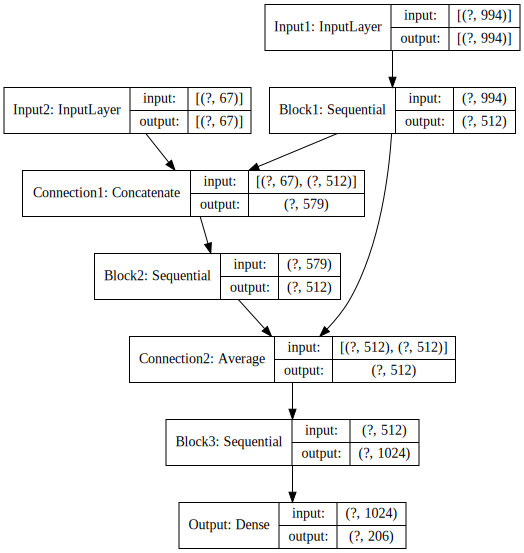

In [70]:
if IN_COLAB:
    model_test = create_model_resnet(len(train.columns), len(train_pca.columns), len(target.columns))
    model_test.summary()
    display_svg(SVG(model_to_dot(model_test, show_shapes=True, dpi=72).create(prog="dot", format="svg")))

In [71]:
def create_model_resnet_tuning(n_features, n_features_2, n_labels, params):
    n_hidden_layers = params["n_layers"]
    units = params["units"]
    activations = params["activations"]

    input_1 = L.Input(shape=(n_features,), name="Input1")
    input_2 = L.Input(shape=(n_features_2,), name="Input2")

    block_1 = tf.keras.Sequential(
        [
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(units[-3], activation=activations[-4])),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(units[n_hidden_layers - 1], activation=activations[-3])),
        ],
        name="Block1",
    )

    output_1 = block_1(input_1)
    connection_1 = L.Concatenate(name="Connection1")([input_2, output_1])

    layers_2 = []
    for i in range(n_hidden_layers):
        layers_2 += [
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(units[i], activation=activations[i])),
        ]
    block_2 = tf.keras.Sequential(layers_2, name="Block2")

    output_2 = block_2(connection_1)
    connection_2 = L.Average(name="Connection2")([output_1, output_2])

    block_3 = tf.keras.Sequential(
        [
            L.BatchNormalization(),
            tfa.layers.WeightNormalization(L.Dense(units[-2], activation=activations[-2])),
            L.BatchNormalization(),
            L.Dropout(0.2),
            tfa.layers.WeightNormalization(L.Dense(units[-1], activation=activations[-1])),
            L.BatchNormalization(),
        ],
        name="Block3",
    )

    output_3 = block_3(connection_2)

    # output = L.Dense(n_labels, activation="sigmoid", name="Output")(output_3)
    output = L.Dense(n_labels, name="Output")(output_3)

    model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=output)

    return model

# Model - TabNet

- [Pre-train](https://www.kaggle.com/optimo/selfsupervisedtabnet/notebook)

In [72]:
def create_model_tabnet(seed, pre_train=False):
    tabnet_params = dict(
        n_d=32,  # 32
        n_a=32,  # 32
        n_steps=1,
        n_independent=1,
        n_shared=1,
        gamma=1.3,
        lambda_sparse=0,
        optimizer_fn=optim.Adam,
        optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
        mask_type="entmax",
        scheduler_params=dict(mode="min", patience=5, min_lr=1e-5, threshold=1e-5, factor=0.1),
        scheduler_fn=torch_ReduceLROnPlateau,
        seed=seed,
        verbose=0,
    )

    if pre_train:
        model = TabNetPretrainer(**tabnet_params)
    else:
        model = TabNetRegressor(**tabnet_params)

    return model

In [73]:
def create_model_tabnet_tuning(seed, params=None):
    tabnet_params = dict(
        n_d=params["dim"],
        n_a=params["dim"],
        n_steps=1,
        n_independent=1,
        n_shared=1,
        gamma=1.3,
        lambda_sparse=0,
        optimizer_fn=optim.Adam,
        optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
        mask_type="entmax",
        scheduler_params=dict(mode="min", patience=5, min_lr=1e-5, threshold=1e-5, factor=0.1),
        scheduler_fn=torch_ReduceLROnPlateau,
        seed=seed,
        verbose=0,
    )

    model = TabNetRegressor(**tabnet_params)

    return model

# Training

In [82]:
models = [
    {"model_name": "ResNet", "cv": "with_drug_id"},
    #{"model_name": "ResNet", "cv": "without_drug_id"},
    {"model_name": "TabNet", "cv": "with_drug_id"},
    #{"model_name": "TabNet", "cv": "without_drug_id"},
]
N_SEED = 3
N_STARTS = len(models) * N_SEED
N_SPLITS = 7
pre_train_models = ["ResNet"]

if IN_COLAB:
    models = [
        {"model_name": "ResNet", "cv": "with_drug_id"},
        #{"model_name": "ResNet", "cv": "without_drug_id"},
        {"model_name": "TabNet", "cv": "with_drug_id"},
        #{"model_name": "TabNet", "cv": "without_drug_id"},
    ]
    N_SEED = 3
    N_STARTS = len(models) * N_SEED
    N_SPLITS = 7

In [83]:
def learning(
    train_,
    train_pca_,
    target_,
    drug_,
    test_,
    test_pca_,
    N_STARTS=6,
    N_SPLITS=5,
    train_flags=["normal"],
    transfer_learning_base=None,
    params=None,
):
    oof = {}
    predictions = {}

    for seed in range(N_STARTS):
        model_name = models[seed % len(models)]["model_name"]
        cv = models[seed % len(models)]["cv"]

        if ("pre_train" in train_flags and model_name not in pre_train_models):
            continue
            
        seed_result = pd.DataFrame(np.zeros(target_.shape))
        prediction = pd.DataFrame(np.zeros(ss.shape))

        if "pre_train" in train_flags:
            kfold_seed = random_seed + seed
        else:
            kfold_seed = seed

        fix_seed(kfold_seed)

        if "fold" in drug_.columns:
            drug_.drop(["fold"], axis=1, inplace=True)

        # LOCATE DRUGS
        vc = drug_.drug_id.value_counts()
        #vc1 = vc.loc[(vc == 6) | (vc == 12) | (vc == 18)].index.sort_values()
        #vc2 = vc.loc[(vc != 6) & (vc != 12) & (vc != 18)].index.sort_values()
        vc1 = vc.loc[vc <= 19].index.sort_values()
        vc2 = vc.loc[vc > 19].index.sort_values()
        
        dct1 = {}
        dct2 = {}

        # STRATIFY DRUGS 18X OR LESS
        skf = MultilabelStratifiedKFold(n_splits=N_SPLITS, random_state=kfold_seed, shuffle=True)
        tmp = pd.concat([drug_, target_], axis=1).groupby("drug_id").mean().loc[vc1]
        for fold, (idxT, idxV) in enumerate(skf.split(tmp, tmp)):
            dd = {k: fold for k in tmp.index[idxV].values}
            dct1.update(dd)

        # STRATIFY DRUGS MORE THAN 18X
        skf = MultilabelStratifiedKFold(n_splits=N_SPLITS, random_state=kfold_seed, shuffle=True)
        tmp = drug_.loc[drug_.drug_id.isin(vc2)].reset_index(drop=True)
        for fold, (idxT, idxV) in enumerate(skf.split(tmp, tmp)):
            dd = {k: fold for k in tmp.sig_id[idxV].values}
            dct2.update(dd)

        # ASSIGN FOLDS
        drug_["fold"] = drug_.drug_id.map(dct1)
        drug_.loc[drug_.fold.isna(), "fold"] = drug_.loc[drug_.fold.isna(), "sig_id"].map(dct2)
        drug_.fold = drug_.fold.astype("int8")

        for n, (tr, te) in enumerate(
            MultilabelStratifiedKFold(n_splits=N_SPLITS, random_state=kfold_seed, shuffle=True).split(target_, target_)
        ):
            if cv == "with_drug_id":
                tr = drug_[drug_["fold"] != n].index
                te = drug_[drug_["fold"] == n].index

            start_time = time()

            # Build Data Sets
            if model_name == "ResNet":
                x_tr = [
                    add_swap_noise(tr, train_.values[tr], train_.values[tr]),
                    train_pca_.values[tr],
                ]
                x_val = [
                    train_.values[te],
                    train_pca_.values[te],
                ]
                y_tr, y_val = target_.astype(float).values[tr], target_.astype(float).values[te]
                x_tt = [test_.values, test_pca_.values]

            else:
                x_tr, x_val = add_swap_noise(tr, train_.values[tr], train_.values[tr]), train_.values[te]
                y_tr, y_val = target_.astype(float).values[tr], target_.astype(float).values[te]
                x_tt = test_.values

            # Build Model
            if model_name == "ResNet":
                if "hyperparameter_tuning" in train_flags:
                    model = create_model_resnet_tuning(
                        len(train_.columns), len(train_pca_.columns), len(target_.columns), params[model_name]
                    )
                    
                    if "fine_tuning" in train_flags:
                        model_base = create_model_resnet_tuning(
                            len(train_.columns),
                            len(train_pca_.columns),
                            len(transfer_learning_base.columns),
                            params[model_name],
                        )
                    
                else:
                    model = create_model_resnet(len(train_.columns), len(train_pca_.columns), len(target_.columns))

                    if "fine_tuning" in train_flags:
                        model_base = create_model_resnet(
                            len(train_.columns), len(train_pca_.columns), len(transfer_learning_base.columns)
                        )

            elif model_name == "TabNet":
                if "hyperparameter_tuning" in train_flags:
                    model = create_model_tabnet_tuning(kfold_seed, params[model_name])
                    
                elif "pre_train" in train_flags:
                    if n != 0 or seed // len(models) != 0:
                        break

                    model = create_model_tabnet(kfold_seed, pre_train=True)

                else:
                    model = create_model_tabnet(kfold_seed)
                    
                    if "fine_tuning" in train_flags:
                        model_base = create_model_tabnet(kfold_seed, pre_train=True)
                        
            else:
                raise "Model name is invalid."

            if model_name == "TabNet":
                #checkpoint_path = f"{model_name}_repeat:{seed // len(models)}_fold:{n}"
                checkpoint_path = f"{model_name}_repeat:0_fold:0"
                
                if PRE_TRAIN_NON_SCORED_TARGET == "load-others":
                    checkpoint_path = os.path.join(
                        PRE_TRAIN_NON_SCORED_TARGET_MODEL_DIR,
                        checkpoint_path
                    )
                    
                if "fine_tuning" in train_flags and os.path.exists(checkpoint_path):
                    model_base.load_model(checkpoint_path + ".zip")

                    model.fit(
                        X_train=x_tr,
                        y_train=y_tr,
                        eval_set=[(x_val, y_val)],
                        eval_name=["val"],
                        eval_metric=["logits_ll"],
                        max_epochs=200,
                        patience=10,
                        batch_size=1024,
                        virtual_batch_size=32,
                        num_workers=1,
                        drop_last=True,
                        # loss_fn=F.binary_cross_entropy_with_logits,
                        loss_fn=SmoothBCEwLogits(smoothing=1e-6),
                        from_unsupervised=model_base,
                    )
                    
                elif "pre_train" in train_flags:
                    model.fit(
                        X_train=test_.values,
                        eval_set=[train_.values],
                        # eval_name=["val"],
                        max_epochs=200,
                        patience=10,
                        batch_size=1024,
                        virtual_batch_size=32,
                        num_workers=1,
                        drop_last=True,
                        # loss_fn=F.binary_cross_entropy_with_logits,
                        # loss_fn=SmoothBCEwLogits(smoothing=1e-6),
                        pretraining_ratio=0.5,
                    )
                    
                else:
                    model.fit(
                        X_train=x_tr,
                        y_train=y_tr,
                        eval_set=[(x_val, y_val)],
                        eval_name=["val"],
                        eval_metric=["logits_ll"],
                        max_epochs=200,
                        patience=10,
                        batch_size=1024,
                        virtual_batch_size=32,
                        num_workers=1,
                        drop_last=True,
                        # loss_fn=F.binary_cross_entropy_with_logits,
                        loss_fn=SmoothBCEwLogits(smoothing=1e-6),
                    )
                    
                    
                if "pre_train" in train_flags:
                    try:
                        os.remove(checkpoint_path)
                    except OSError:
                        pass
                    model.save_model(checkpoint_path)
                    continue

            else:
                model.compile(
                    optimizer=tfa.optimizers.AdamW(lr=1e-3, weight_decay=1e-5),
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=1e-6),
                    metrics=logloss,
                )

                checkpoint_path = f"{model_name}_repeat:{seed // len(models)}_fold:{n}.hdf5"

                if PRE_TRAIN_NON_SCORED_TARGET == "load-others":
                    checkpoint_path = os.path.join(
                        PRE_TRAIN_NON_SCORED_TARGET_MODEL_DIR,
                        checkpoint_path
                    )                
                
                if "fine_tuning" in train_flags and os.path.exists(checkpoint_path):
                    model_base.load_weights(checkpoint_path)
                    for layer in range(len(model_base.layers[:-1])):
                        model.layers[layer].set_weights(model_base.layers[layer].get_weights())

                if "pre_train" in train_flags:
                    cb_checkpt = ModelCheckpoint(
                        checkpoint_path,
                        monitor="val_loss",
                        verbose=0,
                        save_best_only=True,
                        save_weights_only=True,
                        mode="min",
                    )
                reduce_lr_loss = ReduceLROnPlateau(
                    monitor="val_loss", factor=0.1, patience=5, verbose=0, min_delta=1e-5, min_lr=1e-5, mode="min"
                )
                early_stopping = EarlyStopping(
                    monitor="val_loss",
                    patience=10,
                    mode="min",
                    verbose=0,
                    min_delta=1e-5,
                    restore_best_weights=True,
                )
                if "pre_train" in train_flags:
                    callbacks = [cb_checkpt, reduce_lr_loss, early_stopping]
                else:
                    callbacks = [reduce_lr_loss, early_stopping]
                model.fit(
                    x_tr,
                    y_tr,
                    validation_data=(x_val, y_val),
                    epochs=200,
                    batch_size=128,
                    callbacks=callbacks,
                    verbose=0,
                )

            val_predict = model.predict(x_val)
            val_predict = 1 / (1 + np.exp(-val_predict))
            seed_result.loc[te, :] += val_predict

            if any(flag in train_flags for flag in ["normal", "fine_tuning"]):
                test_predict = model.predict(x_tt)
                test_predict = 1 / (1 + np.exp(-test_predict))
                prediction += test_predict / N_SPLITS

            if model_name == "TabNet":
                fold_score = np.min(model.history["val_logits_ll"])
            else:
                fold_score = metric(target_.loc[te].values, val_predict)

            print(
                f"[{str(datetime.timedelta(seconds = time() - start_time))[2:7]}] {model_name} {cv}: Seed {seed}, Fold {n}:",
                fold_score,
            )

            K.clear_session()
            del model
            if "model_base" in globals():
                del model_base
            gc.collect()

        oof[f"{model_name}_{cv}_{seed}"] = seed_result
        predictions[f"{model_name}_{cv}_{seed}"] = prediction

    return oof, predictions

## Hyper parameter tuning

In [84]:
def objective(trial):
    tuning_resnet = True
    tuning_tabnet = False

    params = {model["model_name"]: None for model in models}

    if TUNING_RESNET:
        n_layers = trial.suggest_int("n_layers", 2, 5)
        # n_layers = 5

        units = []
        for i in range(n_layers + 3):
            u = trial.suggest_categorical(f"units_{i}", [128, 256, 512, 1024])
            units.append(u)

        activations = []
        for i in range(n_layers + 4):
            a = trial.suggest_categorical(f"activations_{i}", ["relu", "elu", "selu", "swish"])
            activations.append(a)

        params["ResNet"] = {
            "n_layers": n_layers,
            "units": units,
            "activations": activations,
        }

    if TUNING_TABNET:
        dim = trial.suggest_int("dim", 30, 50)

        params["TabNet"] = {
            "dim": dim,
        }

    # Training
    if PRE_TRAIN_NON_SCORED_TARGET == "in-notebook":
        _, _ = learning(
            train[: non_target.shape[0]],
            train_pca[: non_target.shape[0]],
            non_target,
            non_target_drug,
            test,
            test_pca,
            N_STARTS,
            N_SPLITS,
            train_flags=["pre_train", "hyperparameter_tuning"],
            params=params,
        )

    oof, predictions = learning(
        train,
        train_pca,
        target,
        target_drug,
        test,
        test_pca,
        N_STARTS,
        N_SPLITS,
        train_flags=["fine_tuning", "hyperparameter_tuning"],  # "normal", "fine_tuning"
        transfer_learning_base=non_target,
        params=params,
    )

    initial_weights = [1.0 / N_STARTS for _ in range(N_STARTS)]
    y_true = target.values[: non_target.shape[0]]

    cv, auc, _ = cross_validation(y_true.shape, initial_weights, y_true, oof)

    return cv * 1000 / auc

In [85]:
if HYPER_PARAMETER_TUNING:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=20, gc_after_trial=True)

In [86]:
if HYPER_PARAMETER_TUNING:
    print("Best trial:")
    trial = study.best_trial

    print("  CV:  {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    print(optuna.importance.get_param_importances(study))

In [87]:
if HYPER_PARAMETER_TUNING:
    raise "Finished parameter tuning."

## Normal training

In [88]:
%%time

if PRE_TRAIN_NON_SCORED_TARGET == "in-notebook":
    _, _ = learning(
        train[: non_target.shape[0]],
        train_pca[: non_target.shape[0]],
        non_target,
        non_target_drug,
        test,
        test_pca,
        N_STARTS,
        N_SPLITS,
        train_flags=["pre_train"],
    )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [89]:
%%time

oof, predictions = learning(
    train,
    train_pca,
    target,
    target_drug,
    test,
    test_pca,
    N_STARTS,
    N_SPLITS,
    train_flags=["fine_tuning"],  # "normal", "fine_tuning"
    transfer_learning_base=non_target,
)

[00:53] ResNet with_drug_id: Seed 0, Fold 0: 0.017780181228887353
[00:50] ResNet with_drug_id: Seed 0, Fold 1: 0.017151633245464714
[00:53] ResNet with_drug_id: Seed 0, Fold 2: 0.018573027367062768
[00:43] ResNet with_drug_id: Seed 0, Fold 3: 0.017995457816106106
[00:54] ResNet with_drug_id: Seed 0, Fold 4: 0.018121315826841594
[01:00] ResNet with_drug_id: Seed 0, Fold 5: 0.017483818154113515
[00:56] ResNet with_drug_id: Seed 0, Fold 6: 0.018124029912674477
Device used : cuda
Device used : cuda

Early stopping occured at epoch 64 with best_epoch = 54 and best_val_logits_ll = 0.01735
Best weights from best epoch are automatically used!
[01:35] TabNet with_drug_id: Seed 1, Fold 0: 0.017348516486716405
Device used : cuda
Device used : cuda

Early stopping occured at epoch 36 with best_epoch = 26 and best_val_logits_ll = 0.01738
Best weights from best epoch are automatically used!
[00:55] TabNet with_drug_id: Seed 1, Fold 1: 0.01737548612106295
Device used : cuda
Device used : cuda

Early 

## Cross Validation

In [90]:
oof_weights = [1.0 / N_STARTS for _ in range(N_STARTS)]
model_weights = [1.0 / len(models) for _ in range(len(models))]
seed_weights = [1.0 / N_SEED for _ in range(N_SEED)]

y_true = target.values[: non_target.shape[0]]

print(f"===== OOF - CV =====")
for key, val in oof.items():
    print(f"OOF Key: {key}, CV: {metric(y_true, val.values[:y_true.shape[0]])}")

oof_by_model = {
    f"{model['model_name']}_{model['cv']}": {
        k: v for k, v in oof.items() if k.startswith(f"{model['model_name']}_{model['cv']}")
    }
    for model in models
}

blend_by_model = {}
for model, oof_ in oof_by_model.items():
    print(f"\n===== Model {model} - CV =====")
    _, _, blend_by_model[model] = cross_validation(y_true.shape, seed_weights, y_true, oof_)

print(f"\n===== Overall - CV =====")
_ = cross_validation(y_true.shape, model_weights, y_true, blend_by_model)

===== OOF - CV =====
OOF Key: ResNet_with_drug_id_0, CV: 0.017892097531969107
OOF Key: TabNet_with_drug_id_1, CV: 0.01758711555738152
OOF Key: ResNet_with_drug_id_2, CV: 0.017907568715671753
OOF Key: TabNet_with_drug_id_3, CV: 0.017553751659001547
OOF Key: ResNet_with_drug_id_4, CV: 0.0178573775746978
OOF Key: TabNet_with_drug_id_5, CV: 0.017525034962151916

===== Model ResNet_with_drug_id - CV =====
Blended CV: 0.017434018806627604, AUC : 0.6319406159362074

===== Model TabNet_with_drug_id - CV =====
Blended CV: 0.01711740273183977, AUC : 0.6207682207849142

===== Overall - CV =====
Blended CV: 0.01705991763532231, AUC : 0.6256914601942055


In [91]:
optimize = "lagrange"

if IN_COLAB:
    optimize = "lagrange"  # "lagrange", "fixed"

if optimize == "fixed":
    model_weights = [0.54, 0.46]
    cross_validation(y_true.shape, model_weights, y_true, blend_by_model)

    print(f"Fixed weights: {model_weights}")

elif optimize == "lagrange":
    # https://www.kaggle.com/gogo827jz/optimise-blending-weights-with-bonus-0#Bonus-(Lagrange-Multiplier)

    def lagrange_func(params):
        # weights, _lambda = params
        blend_ = blend(y_true.shape, params[:-1], blend_by_model)
        return metric(y_true, blend_) - params[-1] * (sum(params[:-1]) - 1)

    grad_l = grad(lagrange_func)

    def lagrange_obj(params):
        # weights, _lambda = params
        d = grad_l(params).tolist()
        return d[:-1] + [sum(params[:-1]) - 1]

    optimized_weights = fsolve(lagrange_obj, model_weights + [1.0])
    cross_validation(y_true.shape, optimized_weights[:-1], y_true, blend_by_model)

    print(f"Optimized weights: {optimized_weights[:-1]}")
    print(f"Check the sum of all weights: {sum(optimized_weights[:-1])}")

    model_weights = optimized_weights[:-1]

Blended CV: 0.017040448954773656, AUC : 0.623164553039357
Optimized weights: [0.32405133 0.67594867]
Check the sum of all weights: 1.0


In [92]:
predictions_by_model = {
    f"{model['model_name']}_{model['cv']}": {
        k: v for k, v in predictions.items() if k.startswith(f"{model['model_name']}_{model['cv']}")
    }
    for model in models
}

blend_by_model = {
    f"{model['model_name']}_{model['cv']}": pd.DataFrame(
        blend(ss.shape, seed_weights, predictions_by_model[f"{model['model_name']}_{model['cv']}"])
    )
    for model in models
}

for a, b in itertools.combinations(blend_by_model.keys(), 2):
    corr = blend_by_model[a].corrwith(blend_by_model[b], axis=1)
    print(f"Prediction correlation between {a} and {b}: {corr.mean()}")

Prediction correlation between ResNet_with_drug_id and TabNet_with_drug_id: 0.9191421998400818


# Postprocessing

In [93]:
# Weighted blend
submit_df.loc[:, target.columns] = blend(ss.shape, model_weights, blend_by_model)

In [94]:
submit_df.loc[test_df["cp_type"] == "ctl_vehicle", target.columns] = 0

# Output

In [95]:
submit_df.to_csv("submission.csv", index=False)